In [37]:
%%time
from datetime import datetime
a = datetime.now()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_palette("afmhot")
# sns.set_palette("twilight")
# sns.set_style("darkgrid",{"axes.facebolor":"0.90"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":1.5})
sns.set_style("whitegrid")
import pylab
pylab.rcParams['figure.figsize'] = (15, 8)
plt.style.use('dark_background')


CPU times: total: 0 ns
Wall time: 2.98 ms


In [38]:
%%time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Input, Activation, Dropout
import tensorflow.keras as tfk

CPU times: total: 0 ns
Wall time: 0 ns


In [39]:
import sklearn.datasets
cancer=sklearn.datasets.load_breast_cancer()

In [40]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [41]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
y = cancer['target']

df['classification'] = y
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classification
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [42]:
# 212 - Malignant ~ 0
# 357 - Benign ~ 1

In [43]:
df['classification']= df['classification'].apply(lambda x : 1 if x==0 else 0)

<AxesSubplot:xlabel='classification', ylabel='count'>

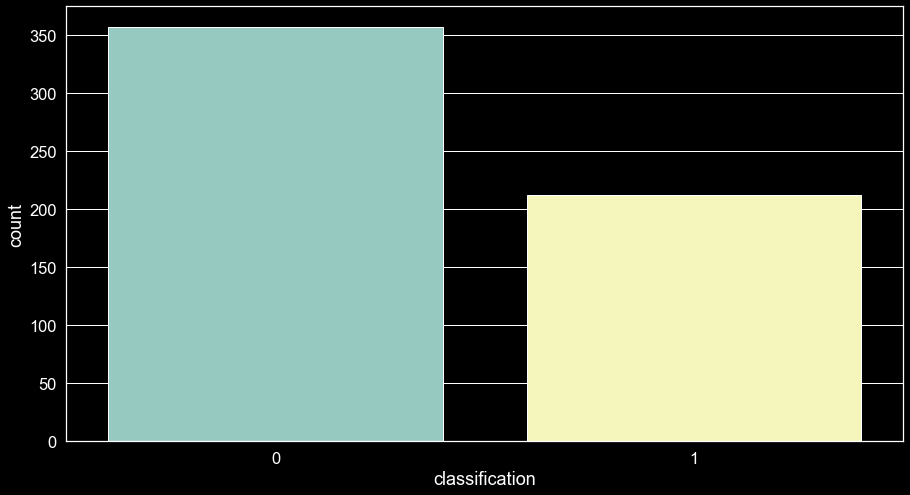

In [44]:
sns.countplot(data=df, x=df['classification'])

In [45]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()

In [46]:
target='classification'
y=df[target].values
# X = df.loc[df.columns != target]
X = df.loc[:,df.columns != target].values


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415)

In [48]:
pd.DataFrame(y_train).value_counts()

0    269
1    157
dtype: int64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=415,stratify=y)
pd.DataFrame(y_train).value_counts()

0    267
1    159
dtype: int64

In [50]:
y_test.sum()

53

In [51]:
len(X_train), len(y_test)

(426, 143)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
model = Sequential()

In [54]:
model.add(Dense(128, input_dim=30, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.33))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.33))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trai

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1, patience=25)

In [58]:
%%time
history=model.fit(X_train,y_train, epochs=700,validation_data=(X_test,y_test),verbose=0,batch_size=2400, callbacks=[early_stop])

Epoch 122: early stopping
CPU times: total: 4.61 s
Wall time: 3.79 s


In [59]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.690173,0.551643,0.680031,0.671329
1,0.681205,0.624413,0.672813,0.790210
2,0.672041,0.657277,0.665168,0.874126
3,0.671060,0.676056,0.656892,0.902098
4,0.660447,0.704225,0.648336,0.909091
...,...,...,...,...
117,0.066501,0.978873,0.061933,0.993007
118,0.075374,0.981221,0.060649,0.993007
119,0.058458,0.978873,0.060135,0.993007
120,0.074098,0.971831,0.060861,0.993007


In [60]:
hist = model.history.history

In [61]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0630 - accuracy: 0.9930


[0.06295289844274521, 0.9930070042610168]

<AxesSubplot:>

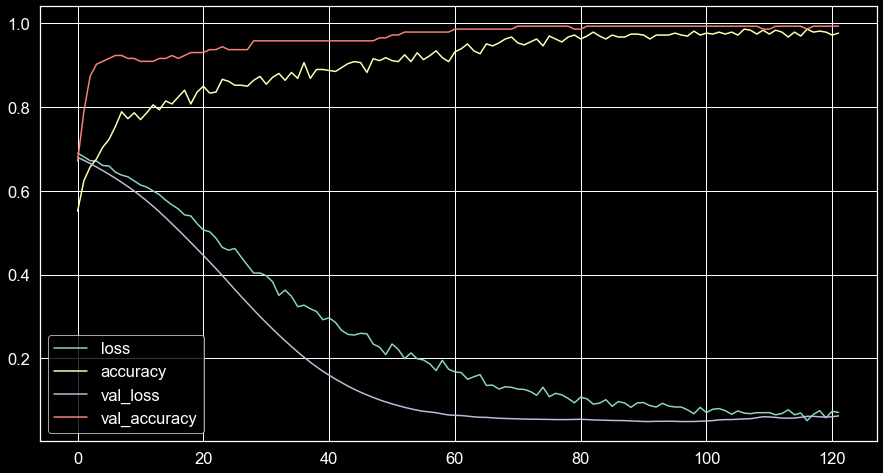

In [62]:
pd.DataFrame(hist).plot()

<AxesSubplot:>

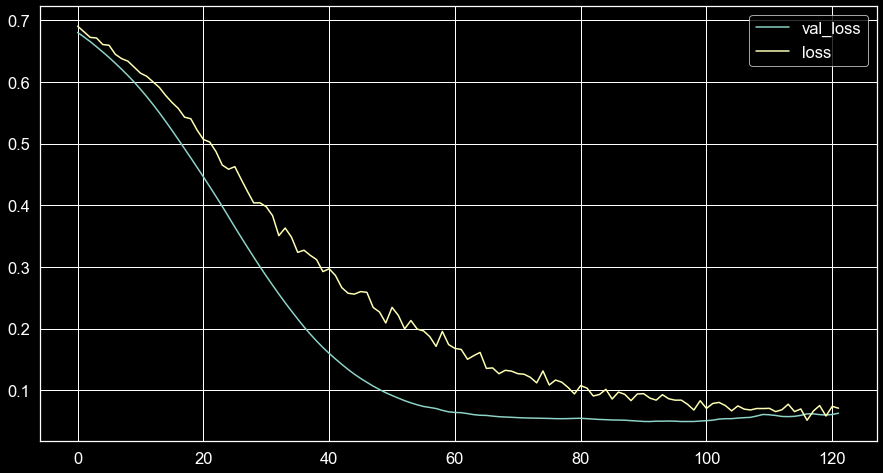

In [63]:
pd.DataFrame(hist)[['val_loss','loss']].plot()

<AxesSubplot:>

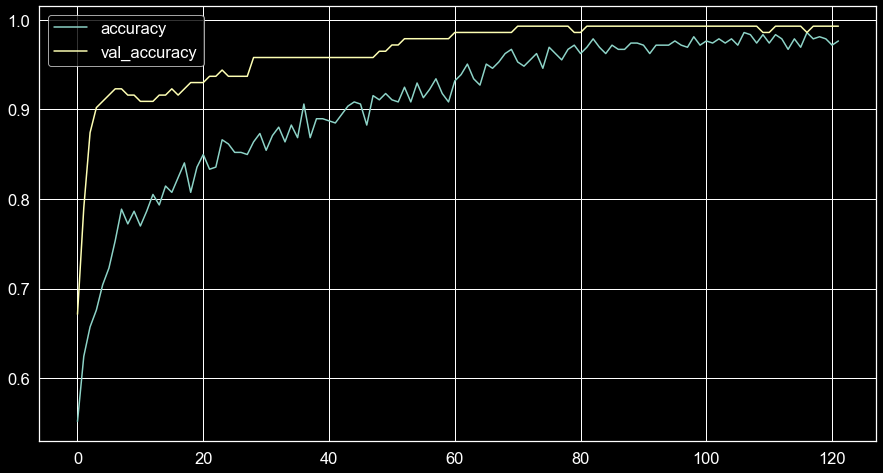

In [64]:
pd.DataFrame(hist)[['accuracy','val_accuracy']].plot()

In [65]:
pred = model.predict(X_test)

In [66]:
final = pd.DataFrame(pred, columns=['logit'])

In [67]:
final['binary']=final['logit'].apply(lambda x:1 if x>=0.50 else 0)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(y_test,final['binary'].values))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [70]:
#               precision    recall  f1-score   support

#            0       0.99      1.00      0.99        90
#            1       1.00      0.98      0.99        53

#     accuracy                           0.99       143
#    macro avg       0.99      0.99      0.99       143
# weighted avg       0.99      0.99      0.99       143

<AxesSubplot:>

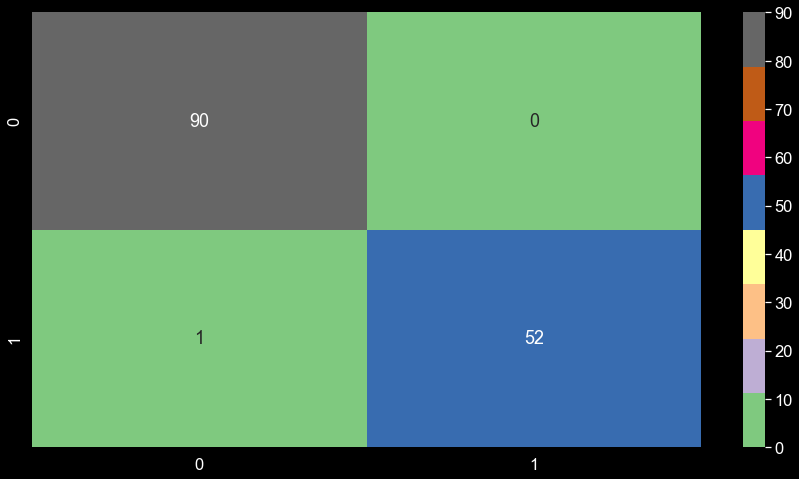

In [71]:
cm=confusion_matrix(y_test,final.binary)
sns.heatmap(cm,annot=True,cmap='Accent')

In [72]:
print(datetime.now() - a)

0:00:08.300262
